In [1]:
%reset
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import eigs
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
from matplotlib.pyplot import cm
import cmocean
from xgcm import Grid


Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
##Unparameterized run
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
fs_05 = xr.open_dataset('static.nc', decode_times=False)
os_05 = xr.open_dataset('ocean.stats.nc', decode_times=False)
av_05 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

# ##Increasing GM and BS

##Contains default setup based on Jansen et al 2019. MEKE_VISCOSITY_COEFF_KU = -0.15; MEKE_KHCOEFF = 0.15
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_GM_BS_default/
# av_05_GMBS0 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

## MEKE_VISCOSITY_COEFF_KU = -0.3; MEKE_KHCOEFF = 0.3
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test5
av_05_GMBS5 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
ResFn_GMBS5 = xr.open_dataset('MEKEResFn_00030002.nc', decode_times=False)
## MEKE_VISCOSITY_COEFF_KU = -0.5; MEKE_KHCOEFF = 0.5
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test6
# av_05_GMBS6 = xr.open_dataset('averages_00031502.nc', decode_times=False) 

## MEKE_VISCOSITY_COEFF_KU = -0.8; MEKE_KHCOEFF = 0.8
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test13
av_05_GMBS13 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
ResFn_GMBS13 = xr.open_dataset('MEKEResFn_00030002.nc', decode_times=False)

##Increasing BS

## MEKE_VISCOSITY_COEFF_KU = -0.1; MEKE_KHCOEFF = 0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test26
# av_05_BS26 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

## MEKE_VISCOSITY_COEFF_KU = -0.15; MEKE_KHCOEFF = 0.0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test15
# av_05_BS15 = xr.open_dataset('averages_00031502.nc', decode_times=False)  


## MEKE_VISCOSITY_COEFF_KU = -0.2; MEKE_KHCOEFF = 0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test27
# av_05_BS27 = xr.open_dataset('averages_00031502.nc', decode_times=False) 

## MEKE_VISCOSITY_COEFF_KU = -0.3; MEKE_KHCOEFF = 0.0
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test16
av_05_BS16 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
ResFn_GMBS16 = xr.open_dataset('MEKEResFn_00030002.nc', decode_times=False)


# ##Increasing GM

## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.15
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test24
# av_05_GM24 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.3
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test25
av_05_GM25 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
ResFn_GMBS25 = xr.open_dataset('MEKEResFn_00030002.nc', decode_times=False)

## MEKE_VISCOSITY_COEFF_KU = -0.0; MEKE_KHCOEFF = 0.5
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test7
# av_05_GM7 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

## MEKE_VISCOSITY_COEFF_KU = -0.0; MEKE_KHCOEFF = 0.6
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test8
# av_05_GM8 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

##GME RUNS:
## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.3 with advection and dissipation of MEKE
%cd /glade/p/univ/unyu0004/eyankovsky/GME_testing/GME_test1
av_05_GME1 = xr.open_mfdataset(['averages_00031502.nc'], decode_times=False)

## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.3 with NO advection and dissipation of MEKE
%cd /glade/p/univ/unyu0004/eyankovsky/GME_testing/GME_test2
av_05_GME2 = xr.open_mfdataset(['averages_00031502.nc'], decode_times=False)

## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.3 with advection and dissipation of MEKE, additional filtering (5 passes vs. 1 in test1&2)
%cd /glade/p/univ/unyu0004/eyankovsky/GME_testing/GME_test3
av_05_GME3 = xr.open_mfdataset(['averages_00031502.nc'], decode_times=False)



##TRUTH CASE:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
av_truth = xr.open_dataset('averages_00002702.nc', decode_times=False)  

/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test5
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test13
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test16
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test25
/glade/p/univ/unyu0004/eyankovsky/GME_testing/GME_test1
/glade/p/univ/unyu0004/eyankovsky/GME_testing/GME_test2
/glade/p/univ/unyu0004/eyankovsky/GME_testing/GME_test3
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5


In [4]:
#Read in various grid variables from the static file and forcing:
lon=fs_05['geolon']; lat=fs_05['geolat']
depth = fs_05['depth_ocean']

xh = fs_05.xh.values
yh = fs_05.yh.values

time = 100

In [5]:
#1/4 degree:560 lat x 240 lon 
#60,460 in 1/4 degree is nominal analysis point!
index_lon=30; index_lat=40 #1/4 degree: (60,460), (120,160), (60,80), (120,80), (200,80)

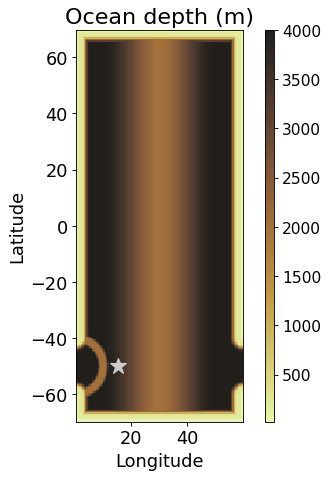

In [6]:
#Plotting ocean depth
fig = plt.figure(figsize=(4, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('Ocean depth (m)',fontsize=20)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

plotted =ax1.pcolor(xh,yh,depth,cmap=cmocean.cm.turbid)
ax1.plot(xh[index_lon],yh[index_lat],'*',markersize=15,color=[0.8, 0.8, 0.8])
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('topography.png')

Text(0.5, 1.0, '$1/2^\\circ$ MEKE+GME Extra Filtering')

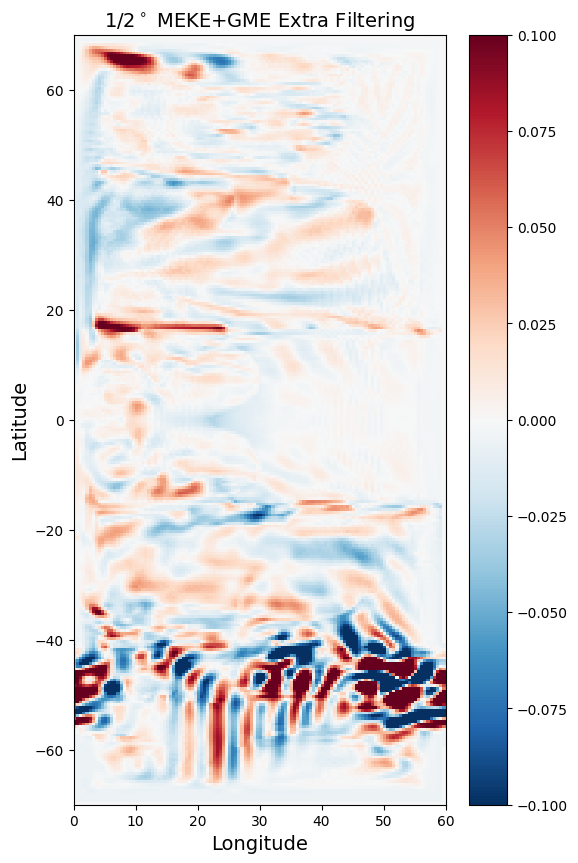

In [12]:
SSH = (av_05_GME3['h'][-1,:,:,:]).sum('zl')-(av_05_GME3['h'][:,:,:,:]).sum('zl').mean('time');
#SSH_stdev_HR= SSH.std('xh')
SSH_stdev= SSH.std('xh')


fig = plt.figure(figsize=(6, 10), dpi= 100,  edgecolor='k')

plot1=SSH.plot(vmin=-.1,vmax=.1,cmap='RdBu_r',add_colorbar=False,xlim=[0,60],ylim=[-70,70])
plt.colorbar(plot1)#, format='%.2e')

#current_cmap = plot1.get_cmap()
#current_cmap.set_bad(color='#D3D3D3')

plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.title('$1/2^\circ$ MEKE+GME Extra Filtering',fontsize=14)
#
# plot1.set_xlim([-100,0])
# plot1.set_ylim([-80,-20])

Text(0, 0.5, 'Latitude')

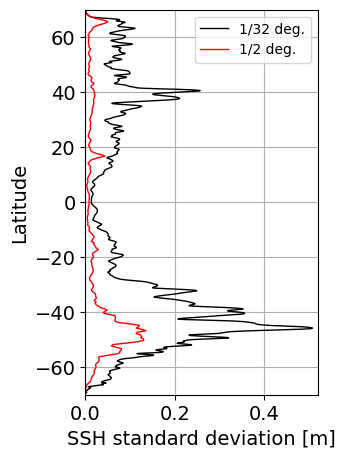

In [13]:
fig = plt.figure(figsize=(3, 5), dpi= 100,  edgecolor='k')
plt.style.use('default')

plt.plot(SSH_stdev_HR,SSH_stdev_HR.yh,c='k',linewidth=1)
plt.plot(SSH_stdev,SSH_stdev.yh,c='r',linewidth=1)


plt.grid()

plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.xlim(0, .52)
plt.ylim(-70,70);
plt.xlabel('SSH standard deviation [m]',fontsize=14)
plt.legend(['1/32 deg.','1/2 deg.'],fontsize=10)
plt.ylabel('Latitude',fontsize=14)

In [40]:
SSU = av_05_GMBS13['SSU']
SSV = av_05_GMBS13['SSV']
grid= Grid(av_05_GMBS13, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
SSU = grid.interp(SSU,axis='X')
SSV = grid.interp(SSV,axis='Y')

SKE = (0.5*(SSU**2+SSV**2)).mean('time')
SKE_mean= SKE.mean('xh')
print('done 1')
# SKE_HR= SKE
# SKE_mean_HR= SKE_mean

done 1


Text(0.5, 1.0, '$1/2^\\circ$ MEKE+GM+BS Extreme Values')

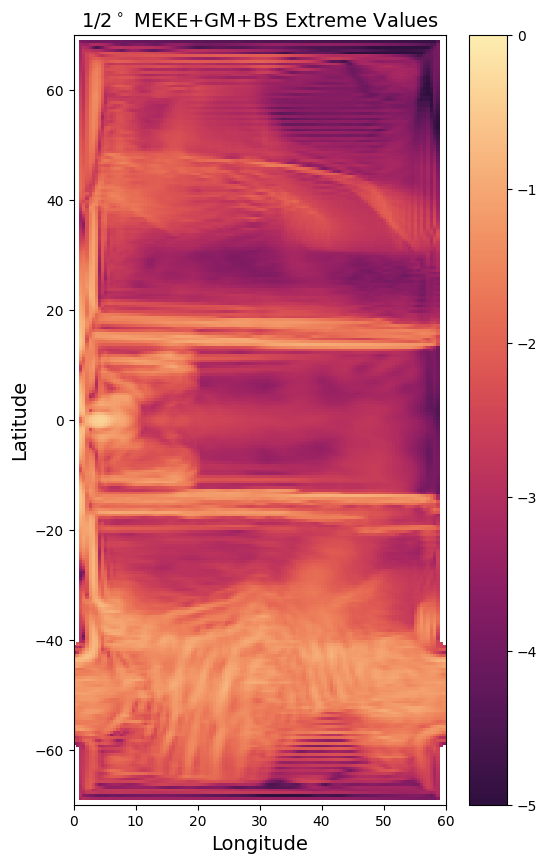

In [41]:


fig = plt.figure(figsize=(6, 10), dpi= 100,  edgecolor='k')

plot1=(xr.ufuncs.log10(SKE)).plot(vmin=-5,vmax=0,cmap=cmocean.cm.matter_r,add_colorbar=False,xlim=[0,60],ylim=[-70,70])
plt.colorbar(plot1)#, format='%.2e')

#current_cmap = plot1.get_cmap()
#current_cmap.set_bad(color='#D3D3D3')

plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.title('$1/2^\circ$ MEKE+GM+BS Extreme Values',fontsize=14)
#
# plot1.set_xlim([-100,0])
# plot1.set_ylim([-80,-20])

Text(0, 0.5, 'Latitude')

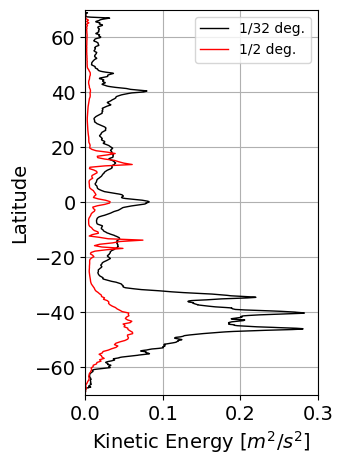

In [42]:
fig = plt.figure(figsize=(3, 5), dpi= 100,  edgecolor='k')
plt.style.use('default')

plt.plot(SKE_mean_HR,SKE_mean_HR.yh,c='k',linewidth=1)
plt.plot(SKE_mean,SKE_mean.yh,c='r',linewidth=1)


plt.grid()

plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.xlim(0, .3)
plt.ylim(-70,70);
plt.xlabel('Kinetic Energy [$m^2/s^2$]',fontsize=14)
plt.legend(['1/32 deg.','1/2 deg.'],fontsize=10)
plt.ylabel('Latitude',fontsize=14)

In [8]:
ResFn_GMBS5


<xarray.Dataset>
Dimensions:     (nv: 2, time: 1, xh: 120, yh: 280)
Coordinates:
  * xh          (xh) float64 0.25 0.75 1.25 1.75 ... 58.25 58.75 59.25 59.75
  * yh          (yh) float64 -69.75 -69.25 -68.75 -68.25 ... 68.75 69.25 69.75
  * time        (time) float64 3e+04
  * nv          (nv) float64 1.0 2.0
Data variables:
    Res_fn      (time, yh, xh) float32 ...
    average_T1  (time) float64 ...
    average_T2  (time) float64 ...
    average_DT  (time) float64 ...
    time_bnds   (time, nv) float64 ...
Attributes:
    filename:   MEKEResFn_00030002.nc
    title:      NeverWorld2
    grid_type:  regular
    grid_tile:  N/A

Text(0.5, 1.0, '$1/2^\\circ$ MEKE+BS')

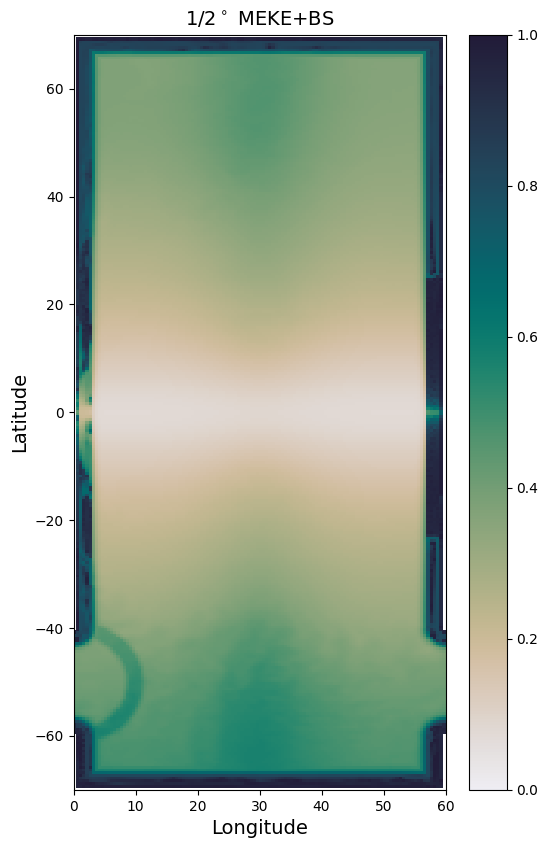

In [16]:


fig = plt.figure(figsize=(6, 10), dpi= 100,  edgecolor='k')

plot1=ResFn_GMBS16['Res_fn'].plot(cmap=cmocean.cm.rain,add_colorbar=False,xlim=[0,60],ylim=[-70,70],vmin=0,vmax=1)
plt.colorbar(plot1)#, format='%.2e')

#current_cmap = plot1.get_cmap()
#current_cmap.set_bad(color='#D3D3D3')

plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.title('$1/2^\circ$ MEKE+BS',fontsize=14)
#